In [74]:
import pandas as pd
import geopandas as gpd
import numpy as np
import funciones

df_maltrato_animal = pd.read_csv(r'C:\Users\samue\OneDrive\Documents\GitHub\captain_planet_sammy\captain-planet\analisis_maltrato_animal\data\clean\categorizado\df_maltrato_animal_actualizado_categorizado', encoding = 'utf-8')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [75]:
# Mapa:
from simpledbf import Dbf5
from fiona.drvsupport import supported_drivers


dbf = Dbf5(r'C:\Users\samue\OneDrive\Documents\GitHub\captain_planet_sammy\captain-planet\analisis_maltrato_animal\data\raw\mapas\poligonos_cp.dbf')
codigos_p = dbf.to_dataframe()

supported_drivers['KML'] = 'rw'

df = gpd.read_file(r'C:\Users\samue\OneDrive\Documents\GitHub\captain_planet_sammy\captain-planet\analisis_maltrato_animal\data\raw\mapas\mapa.kml', driver='KML')
del df['Name']
del df['Description']
df['codigo_postal'] = codigos_p




In [76]:
df_maltrato_animal.rename(columns = {'coord._x':'lat', 'coord._y':'lon'}, inplace = True)

In [77]:
df_maltrato_animal.to_csv(r'C:\Users\samue\OneDrive\Documents\GitHub\captain_planet_sammy\captain-planet\analisis_maltrato_animal\data\clean\mapas\denuncias_mapa.csv')

In [78]:
df_vistimas = pd.read_csv(r'C:\Users\samue\OneDrive\Documents\GitHub\captain_planet_sammy\captain-planet\analisis_maltrato_animal\data\clean\df_victimas_actualizado', encoding = 'utf-8')
df_maltrato_animal_na = pd.read_csv(r'C:\Users\samue\OneDrive\Documents\GitHub\captain_planet_sammy\captain-planet\analisis_maltrato_animal\data\clean\categorizado\df_maltrato_animal_actualizado_categorizado', encoding = 'utf-8')

dbf = Dbf5(r'C:\Users\samue\OneDrive\Documents\GitHub\captain_planet_sammy\captain-planet\data\raw\ri_11.dbf')
df_pob = dbf.to_dataframe().dropna()
funciones.estandarizacion(df_pob, 'colonia', 'alcaldia')

In [79]:
df_pob

,cve_ent,alcaldia,cve_col,colonia,pob_2010,SUP_COL_M2,VIV2010,DENVIVHa,SUPMNZHa,C_DENVIVHa
0,09,azcapotzalco,02-001,aguilera,2014.0,103825.0,680,65.4948,10.38250,4
1,09,azcapotzalco,02-002,aldana,3378.0,154812.0,1088,70.2788,15.48120,4
2,09,azcapotzalco,02-005,angel zimbron,2737.0,242232.0,1067,44.0487,24.22320,3
3,09,azcapotzalco,02-006,arenal,4817.0,286075.0,1493,52.1891,28.60750,3
4,09,azcapotzalco,02-007,centro de azcapotzalco,3043.0,424471.0,1118,26.3387,42.44710,2
...,...,...,...,...,...,...,...,...,...,...
1809,09,alvaro obregon,10-234,union popular emiliano zapata u hab,2618.0,137210.0,796,58.0133,13.72100,3
1810,09,alvaro obregon,10-235,valentin gomez farias,1835.0,113947.0,416,36.5082,11.39470,2
1811,09,alvaro obregon,10-237,villa solidaridad,588.0,30095.5,189,62.8001,3.00955,4
1812,09,alvaro obregon,10-239,zenon delgado,2658.0,107451.0,720,67.0073,10.74510,4


In [80]:


df_vistimas = df_vistimas.groupby(['alcaldiahechos','coloniahechos']).count()
df_pob = df_pob.groupby(['alcaldia','colonia']).sum()


df_vistimas['codigo_postal'] = 0
df_pob['codigo_postal'] = 0


for i in df_vistimas.index:

    datos_temp = df_maltrato_animal_na[(df_maltrato_animal_na['alcaldia']==i[0])&(df_maltrato_animal['colonia']==i[1])]

    if(not datos_temp.empty):
        df_vistimas.loc[i,'codigo_postal'] = datos_temp.iloc[0,18]

for i in df_pob.index:

    datos_temp = df_maltrato_animal_na[(df_maltrato_animal_na['alcaldia']==i[0])&(df_maltrato_animal['colonia']==i[1])]

    if(not datos_temp.empty):
        df_pob.loc[i,'codigo_postal'] = datos_temp.iloc[0,18]



df_vistimas[df_vistimas['codigo_postal']!=0]
#df_vistimas.head(50)
df_vistimas


Unnamed: 0.1  Unnamed: 0  \
alcaldiahechos coloniahechos                                          
alvaro obregon 1 ampliacion presidentes             134         134   
               1 reacomodo corpus christi            10          10   
               1 victoria                           138         138   
               19 de mayo                            16          16   
               2 ampliacion el piru                  70          70   
...                                                 ...         ...   
xochimilco     valle verde                            1           1   
               vaso de regulacion                    31          31   
               villa de la noria                      1           1   
               villa xochimilco u hab                 8           8   
               zacatepecsan mateo xalpa              41          41   

                                           idcarpeta  año_inicio  mes_inicio  \
alcaldiahechos coloniahechos                                                   
alvaro obregon 1 ampliacion presidentes          134         134         134   
               1 reacomodo corpus christi         10          10          10   
               1 victoria                        138         138         138   
               19 de mayo                         16          16          16   
               2 ampliacion el piru               70          70          70   
...                                              ...         ...         ...   
xochimilco     valle verde                         1           1           1   
               vaso de regulacion                 31          31          31   
               villa de la noria                   1           1           1   
               villa xochimilco u hab              8           8           8   
               zacatepecsan mateo xalpa           41          41          41   

                                           fechainicio  delito  categoria  \
alcaldiahechos coloniahechos                                                
alvaro obregon 1 ampliacion presidentes            134     134        134   
               1 reacomodo corpus christi           10      10         10   
               1 victoria                          138     138        138   
               19 de mayo                           16      16         16   
               2 ampliacion el piru                 70      70         70   
...                                                ...     ...        ...   
xochimilco     valle verde                           1       1          1   
               vaso de regulacion                   31      31         31   
               villa de la noria                     1       1          1   
               villa xochimilco u hab                8       8          8   
               zacatepecsan mateo xalpa             41      41         41   

                                           sexo  edad  tipopersona  \
alcaldiahechos coloniahechos                                         
alvaro obregon 1 ampliacion presidentes     101    66          132   
               1 reacomodo corpus christi     9     8           10   
               1 victoria                    99    74          138   
               19 de mayo                    14    12           16   
               2 ampliacion el piru          47    40           70   
...                                         ...   ...          ...   
xochimilco     valle verde                    1     1            1   
               vaso de regulacion            25    20           31   
               villa de la noria              1     1            1   
               villa xochimilco u hab         8     6            8   
               zacatepecsan mateo xalpa      34    30           41   

                                           calidadjuridica  competencia  \
alcaldiahechos coloniahechos                                              
alvaro obregon 

In [81]:
denuncias_por_codigo = df_maltrato_animal.groupby('codigo_postal').count()

denuncias_por_codigo = denuncias_por_codigo.loc[:,['id_denuncia']]

denuncias_por_codigo.reset_index(inplace=True)

In [82]:
carpetas_por_codigo = df_vistimas[df_vistimas['codigo_postal']!=0].groupby('codigo_postal').sum().loc[:,['idcarpeta']]

carpetas_por_codigo.reset_index(inplace=True)

In [83]:
densidad_por_codigo = df_pob[df_pob['codigo_postal']!=0].groupby('codigo_postal').sum().loc[:,['pob_2010', 'SUP_COL_M2']]
densidad_por_codigo['densidad'] = densidad_por_codigo['pob_2010'] / densidad_por_codigo['SUP_COL_M2']

In [84]:
df['codigo_postal'] = df['codigo_postal'].astype('float64')

In [85]:
df = df.merge(carpetas_por_codigo, on='codigo_postal', how='left')
df = df.merge(denuncias_por_codigo, on='codigo_postal', how='left')
df = df.merge(densidad_por_codigo, on='codigo_postal', how='left')

df['idcarpeta'] = df['idcarpeta'].fillna(0)
df['id_denuncia'] = df['id_denuncia'].fillna(0)
df['densidad'] = df['densidad'].fillna(0)

In [86]:
df.to_csv(r'C:\Users\samue\OneDrive\Documents\GitHub\captain_planet_sammy\captain-planet\analisis_maltrato_animal\data\clean\mapas\para_los_mapas.csv')

In [87]:
df

,geometry,codigo_postal,idcarpeta,id_denuncia,pob_2010,SUP_COL_M2,densidad
0,"MULTIPOLYGON (((-99.18925 19.34264, -99.18952 19.34258, -99.19075 19.34228, -99.19119 19.34232, -99.19180 19.34239, -99.19193 19.34170, -99.19215 19.34168, -99.19238 19.34164, -99.19272 19.34164, -99.19278 19.34164, -99.19321 19.34163, -99.19332 19.34161, -99.19351 19.34157, -99.19389 19.34152, -99.19406 19.34154, -99.19428 19.34159, -99.19437 19.34164, -99.19487 19.34201, -99.19588 19.34186, -99.19641 19.34180, -99.19780 19.34167, -99.19801 19.34299, -99.19819 19.34300, -99.19843 19.34302, -99.19924 19.34246, -99.19922 19.34378, -99.19927 19.34391, -99.19934 19.34401, -99.19948 19.34405, -99.20025 19.34420, -99.20067 19.34428, -99.20138 19.34513, -99.20237 19.34517, -99.20229 19.34555, -99.20198 19.34706, -99.20161 19.34694, -99.20100 19.34673, -99.20009 19.34647, -99.19923 19.34631, -99.19846 19.34617, -99.19801 19.34610, -99.19766 19.34607, -99.19589 19.34587, -99.19538 19.34574, -99.19531 19.34568, -99.19516 19.34639, -99.19481 19.34768, -99.19465 19.34827, -99.19443 19.34871, -99.19417 19.34954, -99.19412 19.34975, -99.19391 19.35061, -99.19378 19.35119, -99.19370 19.35149, -99.19268 19.35140, -99.19154 19.35130, -99.19044 19.35120, -99.19049 19.35069, -99.18938 19.35059, -99.18647 19.35033, -99.18649 19.35020, -99.18675 19.34942, -99.18685 19.34914, -99.18741 19.34743, -99.18764 19.34674, -99.18813 19.34540, -99.18819 19.34525, -99.18833 19.34492, -99.18862 19.34411, -99.18876 19.34380, -99.18925 19.34264)))",1000.0,929.0,2.0,2481.0,938757.0,0.002643
1,"MULTIPOLYGON (((-99.19109 19.36349, -99.19050 19.36332, -99.19015 19.36323, -99.18913 19.36301, -99.18916 19.36259, -99.18922 19.36171, -99.18937 19.36052, -99.18951 19.36052, -99.19013 19.36027, -99.19062 19.35943, -99.19069 19.35929, -99.19074 19.35913, -99.19170 19.35902, -99.19191 19.35896, -99.19219 19.35887, -99.19275 19.35861, -99.19339 19.35830, -99.19361 19.35819, -99.19362 19.35818, -99.19396 19.35800, -99.19452 19.35766, -99.19488 19.35741, -99.19507 19.35725, -99.19550 19.35699, -99.19578 19.35687, -99.19652 19.35660, -99.19675 19.35651, -99.19753 19.35625, -99.19854 19.35586, -99.19884 19.35585, -99.19907 19.35612, -99.19906 19.35629, -99.19845 19.35775, -99.19811 19.35854, -99.19792 19.35898, -99.19751 19.35989, -99.19703 19.36086, -99.19671 19.36150, -99.19638 19.36215, -99.19609 19.36274, -99.19584 19.36329, -99.19564 19.36408, -99.19454 19.36407, -99.19426 19.36408, -99.19382 19.36409, -99.19336 19.36409, -99.19309 19.36407, -99.19290 19.36404, -99.19229 19.36389, -99.19174 19.36374, -99.19130 19.36363, -99.19109 19.36349)))",1010.0,578.0,10.0,3225.0,543728.0,0.005931
2,"MULTIPOLYGON (((-99.18647 19.35033, -99.18938 19.35059, -99.19049 19.35069, -99.19044 19.35120, -99.19036 19.35190, -99.19033 19.35216, -99.19021 19.35318, -99.19014 19.35376, -99.19011 19.35401, -99.19008 19.35428, -99.18991 19.35581, -99.18989 19.35600, -99.18971 19.35733, -99.18970 19.35752, -99.18954 19.35888, -99.18947 19.35941, -99.18940 19.36035, -99.18937 19.36052, -99.18922 19.36171, -99.18916 19.36259, -99.18913 19.36301, -99.18867 19.36300, -99.18845 19.36303, -99.18830 19.36302, -99.18821 19.36300, -99.18811 19.36298, -99.18800 19.36295, -99.18784 19.36288, -99.18700 19.36226, -99.18679 19.36215, -99.18662 19.36207, -99.18568 19.36172, -99.18554 19.36172, -99.18537 19.36173, -99.18500 19.36177, -99.18483 19.36178, -99.18388 19.36171, -99.18371 19.36172, -99.18354 19.36178, -99.18268 19.36235, -99.18302 19.36135, -99.18336 19.36015, -99.18376 19.35901, -99.18382 19.35884, -99.18425 19.35745, -99.18470 19.35604, -99.18485 19.35556, -99.18502 19.35501, -99.18518 19.35452, -99.18551 19.35350, -99.18563 19.35312, -99.18589 19.35231, -99.18614 19.35153, -99.18620 19.35133, -99.18631 19.35093, -99.18645 19.35049, -99.18647 19.35033)))",1020.0,783.0,4.0,3599.0,685874.0,0.005247
3,"MULTIPOLYGON (((-99.18645 19.35049, -99.18631 19.35093, -99.18620 19.35133, -99.18614 19.35153, -99.18589 19.35231, -99.18563 19.

<AxesSubplot:>

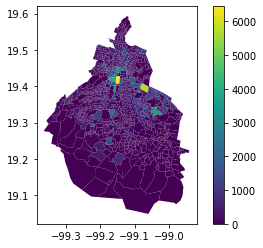

In [88]:
df.plot('idcarpeta', legend=True)

<AxesSubplot:>

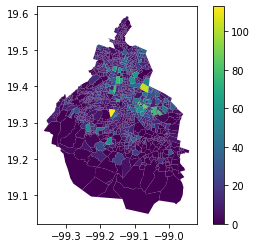

In [89]:
df.plot('id_denuncia', legend=True)

<AxesSubplot:>

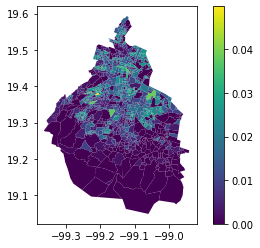

In [90]:
df.plot('densidad', legend=True)

-Agregar mas mapas !

-Pasarlo  A Streamlit

-Checar el Streamlit de J Orcazas

-Checar lo de Time series